### Created by: Anthony D. Cho
### Last update: 28.10.2021

**Subject**: Regression (Decision tree) - Applied to QSAR fish toxicity


## Libraries dependencies

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

from time import time
from pandas import read_csv
from numpy import arange

## Pre-processing functions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Model
from sklearn.tree import DecisionTreeRegressor

## Tree display
from sklearn.tree import plot_tree

## Cross-Validation
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit

## Search
from sklearn.model_selection import GridSearchCV

## Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Customized function

In [4]:
def plot_feature_importances(model, features, width=10, height=6):
    """
        DESCRIPTION:
            Feature importance display function
        
        INPUT:
            @param model: Decision tree regression model
            @type model: sklearn.DecisionTreeRegressor
            
            @param features: feature names
            @type features: list
            
            @param width: width of the display space (default 10)
            @type width: int
            
            @param height: height of the display space (default 8)
            @type height: int
        
        OUTPUT:
            A graphic of feature importance
    """
    
    ## Number of features
    n_features = len(features)
    
    ## Feature importance display
    plt.figure(figsize=(width, height))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

# Problem: QSAR fish toxicity

**Target**: Predict LC50 (Lethal Concentration of 50%)

## Data loading

Source: [QSAR fish toxicity](https://archive.ics.uci.edu/ml/datasets/QSAR+fish+toxicity)

In [5]:
## Load data
data = read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00504/qsar_fish_toxicity.csv', 
                sep=';', header=None)

data.columns = ['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'LC50']

In [6]:
## Data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CIC0       908 non-null    float64
 1   SM1_Dz(Z)  908 non-null    float64
 2   GATS1i     908 non-null    float64
 3   NdsCH      908 non-null    int64  
 4   NdssC      908 non-null    int64  
 5   MLOGP      908 non-null    float64
 6   LC50       908 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.8 KB


In [7]:
## data description
data.describe(include='all')

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285,4.064431
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181,1.455698
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000,3.151750
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000,3.987500
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000,4.907500
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


In [8]:
data.head(4)

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510


## Data pre-processing

In [9]:
## Partition sets
X_train, X_test = train_test_split(data, random_state=20200803)

## Standardizing
scale = StandardScaler().fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

## Predictors and target assignment
y_train = X_train[:, 6]
y_test = X_test[:, 6]
X_train = X_train[:, :6]
X_test = X_test[:, :6]

## Display shape of data
print('(train shape) X: {}, y: {}'.format(X_train.shape, y_train.shape))
print('(test shape) X: {}, y: {}'.format(X_test.shape, y_test.shape))

(train shape) X: (681, 6), y: (681,)
(test shape) X: (227, 6), y: (227,)


## Model selection  + Grid search CV

In [10]:
start = time()

## Cross-Validation's method instance
cvs = ShuffleSplit(n_splits=5, train_size=0.7)

## Parameter-space for searching
param ={'criterion': ['mse', 'friedman_mse', 'mae'],
        'min_samples_split': arange(1, 75),
        'max_depth': arange(1, 15)
       }

## Best model estimation by gridsearchcv
GS = GridSearchCV(estimator=DecisionTreeRegressor(), 
                  cv=cvs, n_jobs=-1, 
                  param_grid=param).fit(X=X_train, y=y_train)

## Display best model's hyperparameters
print('Best hyperparameters: {}'.format(GS.best_params_))

timeUp = time()-start
print('Time spent: {:.2f} seconds'.format(timeUp))

Best hyperparameters: {'criterion': 'mae', 'max_depth': 12, 'min_samples_split': 51}
Time spent: 31.65 seconds


In [11]:
## Compute score
GS.score(X_test, y_test)

0.44722032603960304

mae (Train): 0.6804
mae (Test): 0.4472


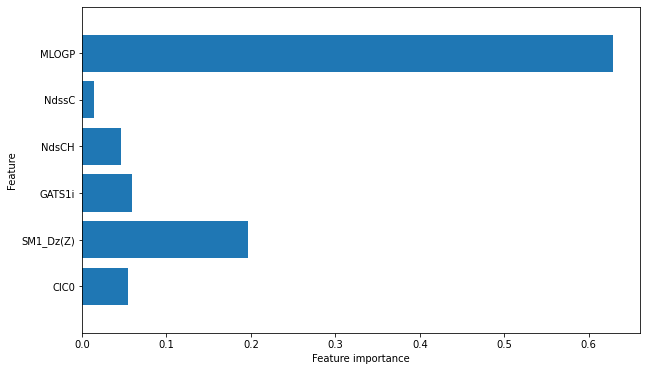

In [12]:
## Fitting a model with best parameters
model = DecisionTreeRegressor(**GS.best_params_).fit(X=X_train, y=y_train)

## Compute score using train set
print('{} (Train): {:.4f}'.format(model.criterion, model.score(X=X_train, y=y_train)))

## Compute score using test set
print('{} (Test): {:.4f}'.format(model.criterion, model.score(X=X_test, y=y_test)))

## feature importances display
plot_feature_importances(model, data.columns[:-1])


In [13]:
## compute prediction
prediction = model.predict(X_test)

print('R2  (test): {:.4f}'.format( model.score(X_test, y_test) ))
print('MSE (test): {:.4f}'.format( mean_squared_error(y_true=y_test, y_pred=prediction) ))
print('MAE (test): {:.4f}'.format( mean_absolute_error(y_true=y_test, y_pred=prediction) ))

R2  (test): 0.4472
MSE (test): 0.6438
MAE (test): 0.5831


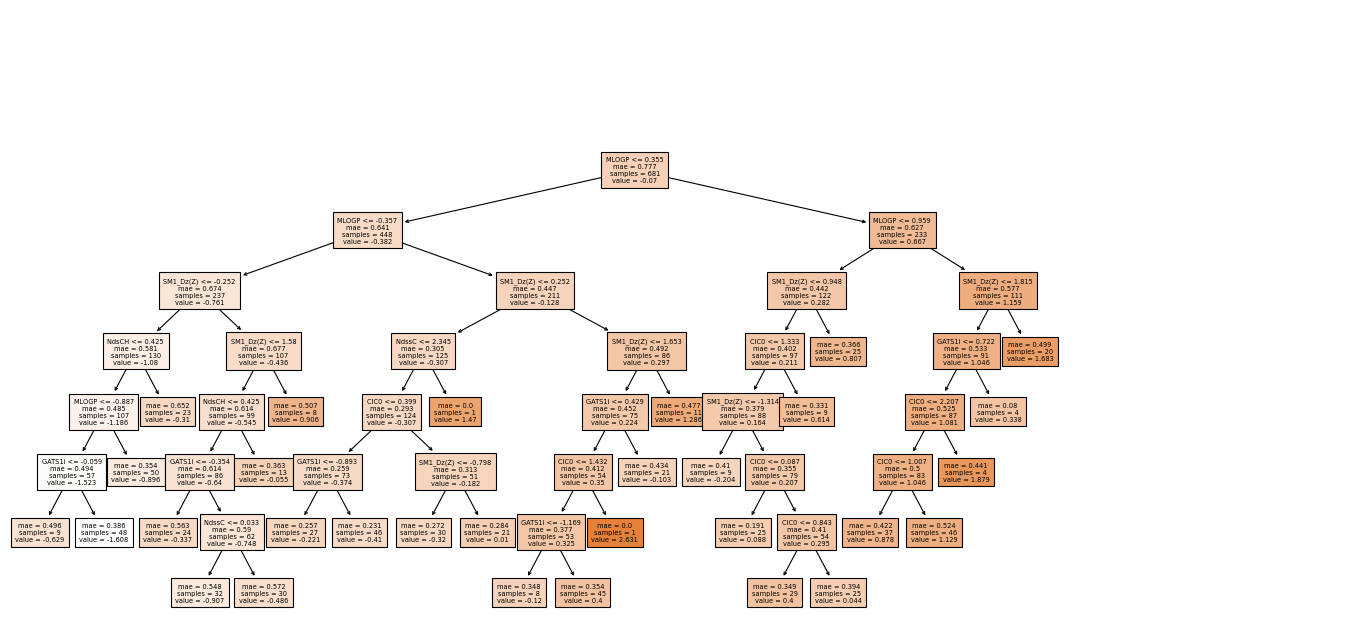

In [16]:
## Display tree

plt.figure(figsize=(17, 8), dpi=80)
plot_tree(decision_tree=model, 
          feature_names=data.columns[:-1],
          fontsize=6, filled=True);
plt.tight_layout()          
#plt.savefig('Regression_tree.pdf')

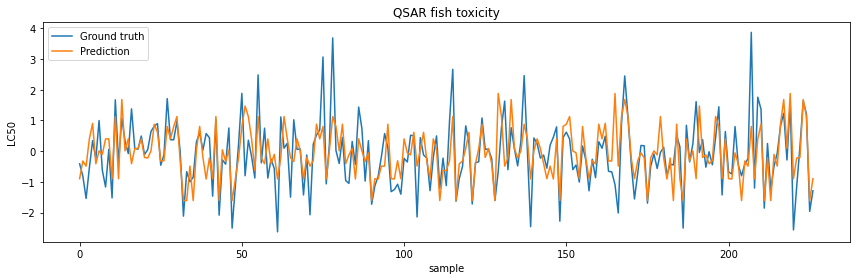

In [14]:
## Display prediction and ground truth
plt.figure(figsize=(12, 4))
plt.plot(y_test, label='Ground truth')
plt.plot(prediction, label='Prediction')
plt.xlabel('sample'); plt.ylabel('LC50')
plt.title('QSAR fish toxicity')
plt.legend()
plt.tight_layout()
plt.show()